# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


The dataset was downloaded from https://www.smard.de/home/downloadcenter/download-marktdaten, a website provided by the Bundesnetzagentur. 
It contains the data for the hourly energy load of the grid of Germany and Luxembourg from 2018-11-01 until 2024-10-31. 
The original dataset contains five columns for start and end time of each data point, the total load in MWh, the residual load (which is the load that exceeds the energy generation through renewable sources) in MWh and the amount of energy generated by pumped storage power plants in MWh. 
We focus on the prediction of the total load, thus we need the columns for start time and total load. 
Since the time frames are always 1 hour, the end time of each time frame would be redundant information and is therefore omitted.

In [58]:

# Load the data
# Replace 'your_dataset.csv' with the path to your actual dataset
df = pd.read_csv('Realisierter_Stromverbrauch_201811010000_202411010000_Stunde.csv', sep=';', names=["from", "to", "load", "residual", "pumped"], header=0)

# Number of samples
num_samples = df.shape[0]

# Number of features
num_features = df.shape[1]

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
print(df.head())



Number of samples: 52608
Number of features: 5
Example data:
               from                to      load  residual   pumped
0  01.11.2018 00:00  01.11.2018 01:00  48879,50  34530,00  3295,75
1  01.11.2018 01:00  01.11.2018 02:00  47312,50  33605,50  3848,00
2  01.11.2018 02:00  01.11.2018 03:00  46093,75  32232,00  4452,25
3  01.11.2018 03:00  01.11.2018 04:00  46710,50  33261,75  4855,75
4  01.11.2018 04:00  01.11.2018 05:00  47624,25  33987,75  3854,50


In [59]:
#Check datatypes

df.dtypes

from        object
to          object
load        object
residual    object
pumped      object
dtype: object

## Adjust Datatypes

The datatypes are all "object". To work with the data, we convert the columns "load", "residual" and "pumped" to floats. The columns "from" and "to" are separated into the components weekday, month, and hour.

In [60]:
#The decimal separator must first be changed from comma to full stop. 


df['load'] = df['load'].str.replace(',', '.').astype(float)
df['load']

0        48879.50
1        47312.50
2        46093.75
3        46710.50
4        47624.25
           ...   
52603    59605.00
52604    56859.25
52605    54040.50
52606    51405.00
52607    48110.75
Name: load, Length: 52608, dtype: float64

In [61]:
df['time'] = pd.to_datetime(df['from'])

#df['time'] = pd.Series(dtype='datetime.datetime')

In [37]:
#split column "from" into day, month, year, hour and minute
#from datetime import datetime

#for i in range (len(df.index)):
 #   x = str(df.at[i, 'from'])
  #  df.at[i, 'from'] = datetime.strptime(x, '%d.%m.%Y %H:%M')
 

In [62]:
print(type(df.at[5, 'time']))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [63]:
df['time']

0       2018-01-11 00:00:00
1       2018-01-11 01:00:00
2       2018-01-11 02:00:00
3       2018-01-11 03:00:00
4       2018-01-11 04:00:00
                ...        
52603   2024-10-31 19:00:00
52604   2024-10-31 20:00:00
52605   2024-10-31 21:00:00
52606   2024-10-31 22:00:00
52607   2024-10-31 23:00:00
Name: time, Length: 52608, dtype: datetime64[ns]

In [64]:
df['month'] = df['time'].dt.month
df['weekday'] = df['time'].dt.dayofweek
df['hour'] = df['time'].dt.hour

In [66]:
df

,from,to,load,residual,pumped,time,month,weekday,hour
0,01.11.2018 00:00,01.11.2018 01:00,48879.50,"34530,00","3295,75",2018-01-11 00:00:00,1,3,0
1,01.11.2018 01:00,01.11.2018 02:00,47312.50,"33605,50","3848,00",2018-01-11 01:00:00,1,3,1
2,01.11.2018 02:00,01.11.2018 03:00,46093.75,"32232,00","4452,25",2018-01-11 02:00:00,1,3,2
3,01.11.2018 03:00,01.11.2018 04:00,46710.50,"33261,75","4855,75",2018-01-11 03:00:00,1,3,3
4,01.11.2018 04:00,01.11.2018 05:00,47624.25,"33987,75","3854,50",2018-01-11 04:00:00,1,3,4
...,...,...,...,...,...,...,...,...,...
52603,31.10.2024 19:00,31.10.2024 20:00,59605.00,"40750,25","156,50",2024-10-31 19:00:00,10,3,19
52604,31.10.2024 20:00,31.10.2024 21:00,56859.25,"37263,25","168,25",2024-10-31 20:00:00,10,3,20
52605,31.10.2024 21:00,31.10.2024 22:00,54040.50,"33643,00","417,50",2024-10-31 21:00:00,10,3,21
52606,31.10.2024 22:00,31.10.2024 23:00,51405.00,"31200,00","583,00",2024-10-31 22:00:00,10,3,22


## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


from        0
to          0
load        0
residual    0
pumped      0
dtype: int64


While trying to convert the data from object to float, an error occurred, because one value was '-' and could not be converted.
This seems to be a missing value. We check for more missing values.

# To do:
# remove this part, if we don't use residual
# data clean 'pumped', if we use it

In [11]:
#To convert data to float, missing values that are not numbers, must be detected and eliminated
for i in range (len(df.index)):
    x = str(df.at[i, 'residual'])
    if (x=='-' or x=='0'):
        print(i, x)


51758 -


Only one missing value was found, represented by '-'. We replace it with the average of the values before and after.

In [14]:
df['residual'] = df['residual'].str.replace(',', '.')

print(df.at[51758, 'residual'])

df.at[51758, 'residual'] = (float(df.at[51758-1, 'residual']) + float(df.at[51758+1, 'residual']))/2

print(df.at[51758, 'residual'])

df['residual'] = df['residual'].astype(float)
df['residual']

-
20946.5


0        34530.00
1        33605.50
2        32232.00
3        33261.75
4        33987.75
           ...   
52603    40750.25
52604    37263.25
52605    33643.00
52606    31200.00
52607    27287.50
Name: residual, Length: 52608, dtype: float64

In [8]:
# Handling missing values
# Example: Replacing NaN values with the mean value of the column
# df.fillna(df.mean(), inplace=True)

# Your code for handling missing values goes here


## Plot the Data

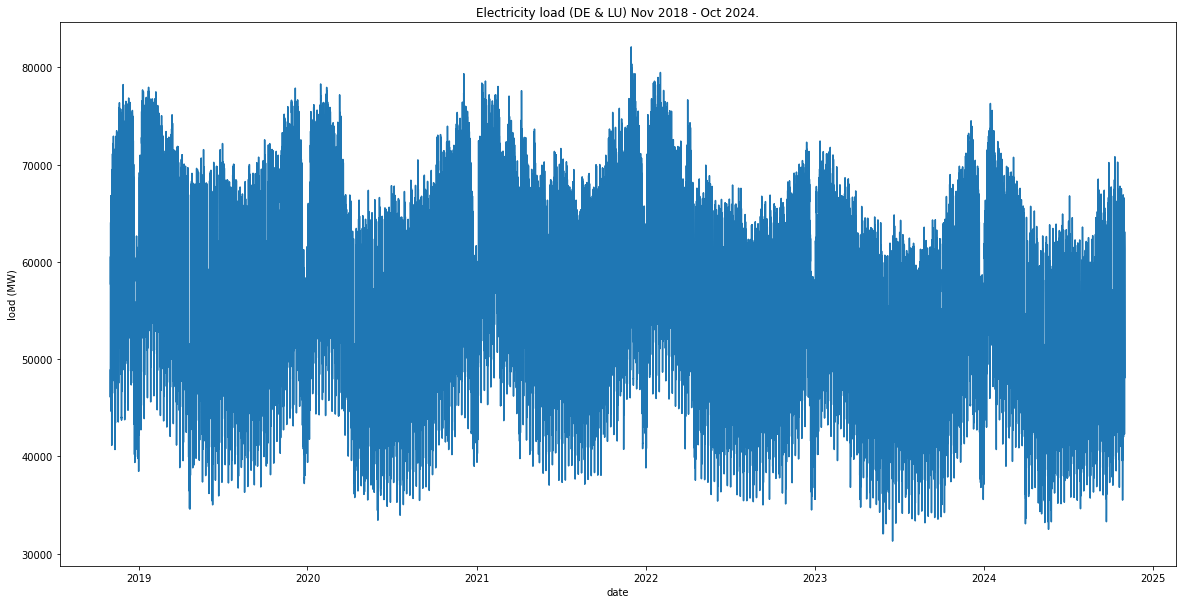

In [16]:
x = df['from']
y = df['load']
plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.title('Electricity load (DE & LU) Nov 2018 - Oct 2024.')
plt.xlabel('date')
plt.ylabel('load (MW)')
plt.show()

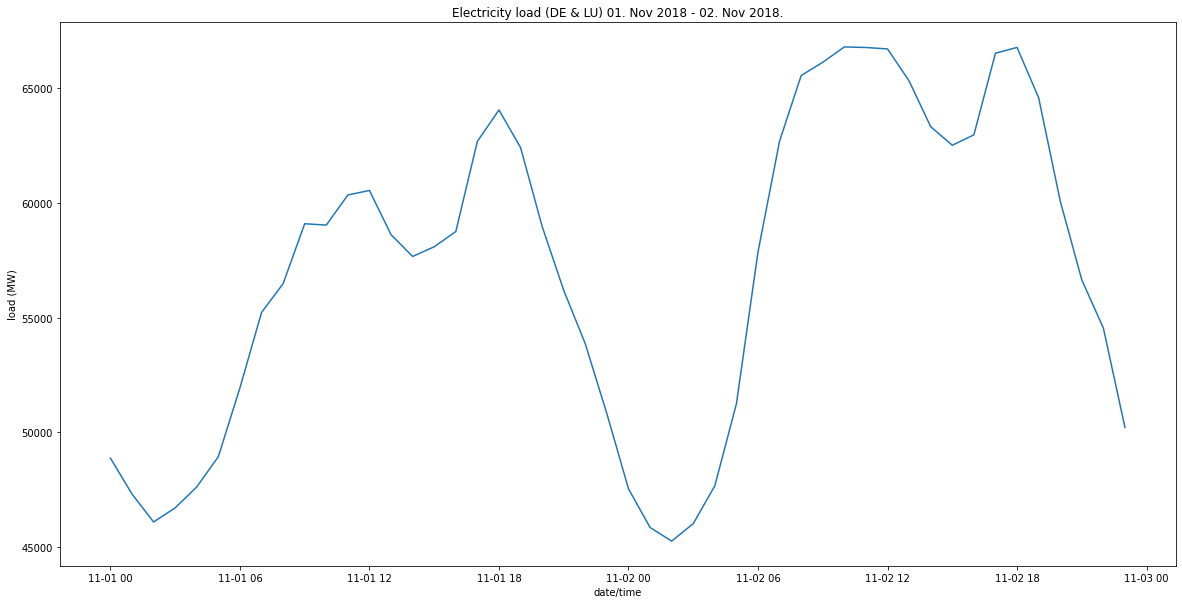

In [17]:
#plot data for 2 days:

df_days = df.iloc[:48]
x = df_days['from']
y = df_days['load']
plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.title('Electricity load (DE & LU) 01. Nov 2018 - 02. Nov 2018.')
plt.xlabel('date/time')
plt.ylabel('load (MW)')
plt.show()

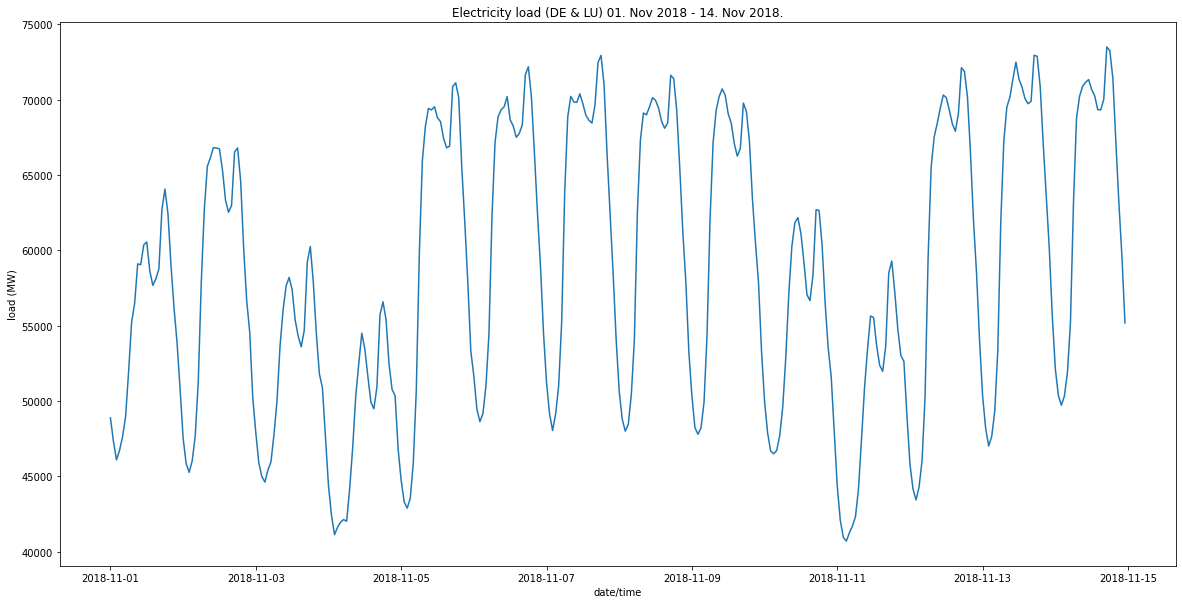

In [18]:
#plot data for 2 weeks:

df_weeks = df.iloc[:336]
x = df_weeks['from']
y = df_weeks['load']
plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.title('Electricity load (DE & LU) 01. Nov 2018 - 14. Nov 2018.')
plt.xlabel('date/time')
plt.ylabel('load (MW)')
plt.show()

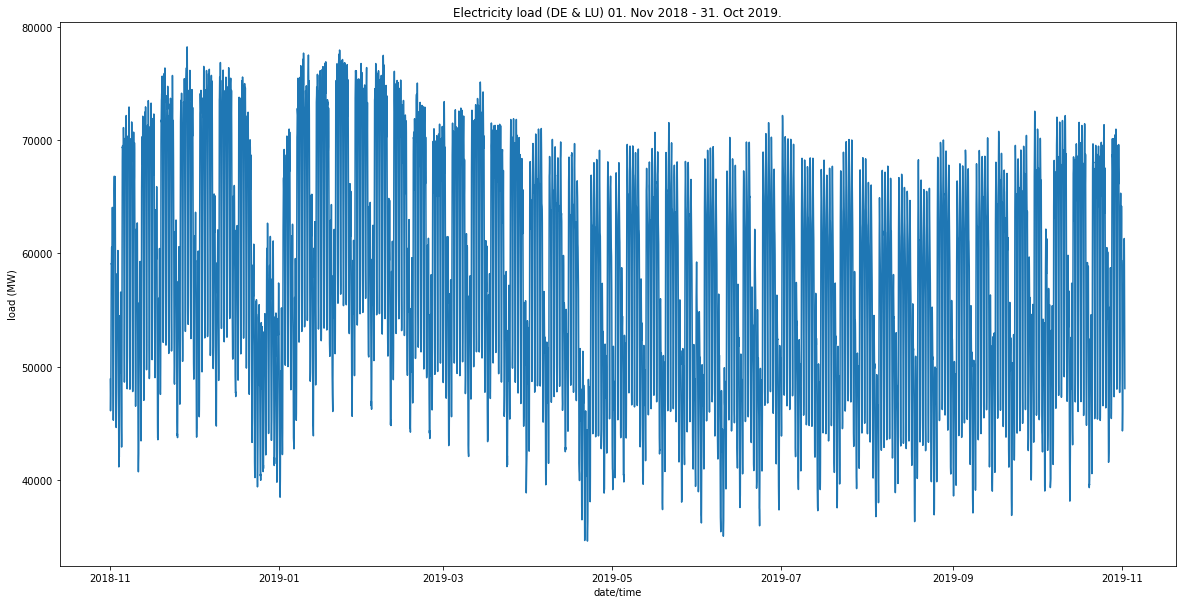

In [19]:
#plot data for 1 year:

df_year = df.iloc[:8784]
x = df_year['from']
y = df_year['load']
plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.title('Electricity load (DE & LU) 01. Nov 2018 - 31. Oct 2019.')
plt.xlabel('date/time')
plt.ylabel('load (MW)')
plt.show()

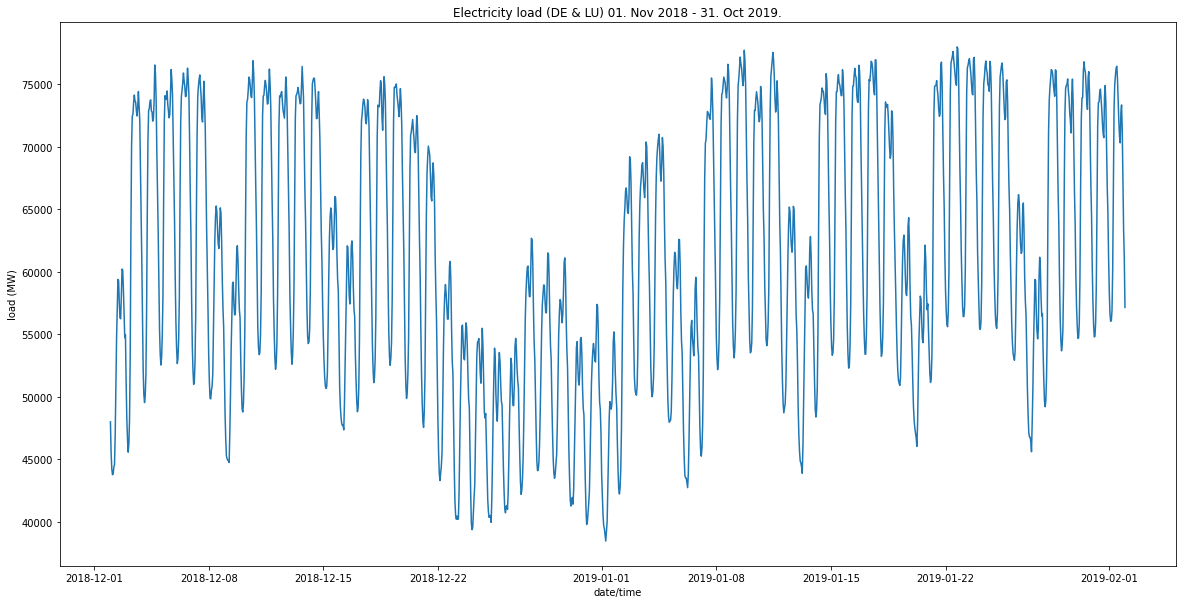

In [20]:
#plot data for Dec / Jan:

df_winter = df.iloc[744:2232]
x = df_winter['from']
y = df_winter['load']
plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.title('Electricity load (DE & LU) 01. Nov 2018 - 31. Oct 2019.')
plt.xlabel('date/time')
plt.ylabel('load (MW)')
plt.show()

## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


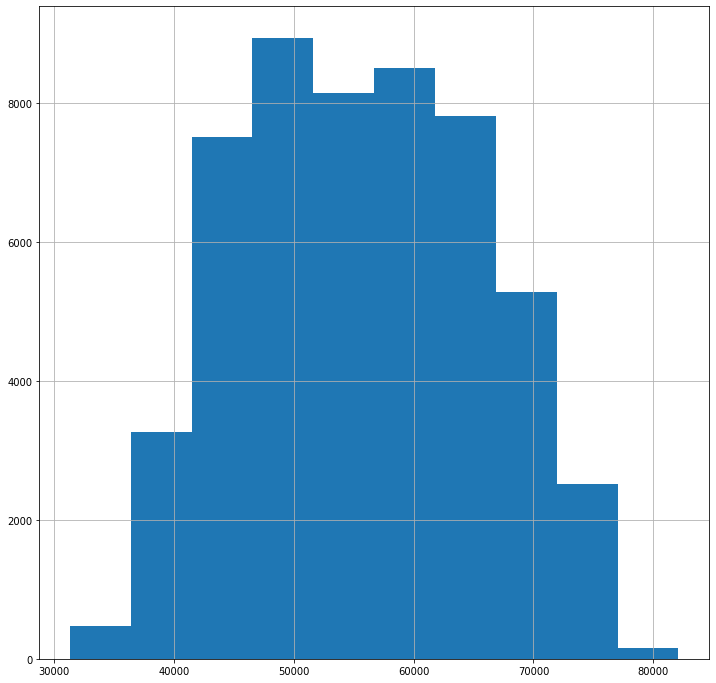

In [22]:
# Example: Plotting histograms of all numerical features
df['load'].hist(figsize=(12, 12))
plt.show()


## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


In [ ]:
# Example: Checking for class imbalance in a classification problem
# sns.countplot(x='target_variable', data=df)

# Your code to investigate possible biases goes here


## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


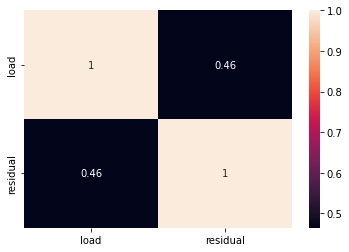

In [21]:
# Example: Plotting a heatmap to show feature correlations
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()


## Normalize data

In [ ]:
print(df.load.min())
print(sf.load.max())

In [24]:
df.load = (df.load - df.load.min()) / (df.load.max() - df.load.min())

In [25]:
df.load

0        0.346145
1        0.315318
2        0.291341
3        0.303475
4        0.321451
           ...   
52603    0.557147
52604    0.503130
52605    0.447677
52606    0.395829
52607    0.331022
Name: load, Length: 52608, dtype: float64